In [28]:
# import libraries
import torchvision
import torchvision import models,transforms

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 


In [32]:
vgg19 = models.vgg19(pretrained=True)
vgg19

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [37]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])])

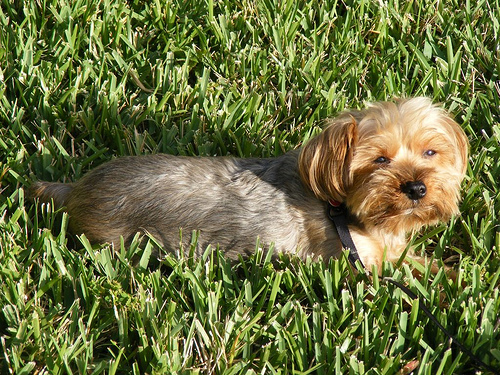

In [40]:
from PIL import Image
img = Image.open('C:/Users/USER/Desktop/Senior_project/Model/Test/ContentImg.jpg')
img

In [36]:
img_t = preprocess(img)
img_t

tensor([[[-0.1686, -0.5373, -0.5765,  ...,  0.2314,  0.0196, -0.6549],
         [-0.2157, -0.5843, -0.6549,  ...,  0.1451,  0.1059, -0.5922],
         [-0.4353, -0.7098, -0.7255,  ...,  0.0431,  0.2706, -0.6627],
         ...,
         [-0.7725, -0.8667, -0.8902,  ..., -0.9373, -0.9137, -0.9137],
         [-0.7176, -0.8745, -0.8745,  ..., -0.9216, -0.9451, -0.8824],
         [-0.8039, -0.8588, -0.8745,  ..., -0.8431, -0.9216, -0.9216]],

        [[-0.2314, -0.4510, -0.3569,  ...,  0.3412,  0.3176, -0.4275],
         [-0.1843, -0.4824, -0.4902,  ...,  0.2314,  0.3804, -0.3961],
         [-0.3490, -0.6392, -0.6392,  ...,  0.0824,  0.4980, -0.5216],
         ...,
         [-0.7490, -0.8118, -0.8118,  ..., -0.8902, -0.8745, -0.8824],
         [-0.7020, -0.8275, -0.8118,  ..., -0.8980, -0.9216, -0.8510],
         [-0.7882, -0.8275, -0.8118,  ..., -0.8353, -0.9059, -0.9137]],

        [[-0.5294, -0.8353, -0.7255,  ..., -0.1922, -0.3098, -0.8431],
         [-0.5059, -0.7961, -0.8275,  ..., -0

In [43]:
batch_t = torch.unsqueeze(img_t,0)
batch_t

tensor([[[[-0.1686, -0.5373, -0.5765,  ...,  0.2314,  0.0196, -0.6549],
          [-0.2157, -0.5843, -0.6549,  ...,  0.1451,  0.1059, -0.5922],
          [-0.4353, -0.7098, -0.7255,  ...,  0.0431,  0.2706, -0.6627],
          ...,
          [-0.7725, -0.8667, -0.8902,  ..., -0.9373, -0.9137, -0.9137],
          [-0.7176, -0.8745, -0.8745,  ..., -0.9216, -0.9451, -0.8824],
          [-0.8039, -0.8588, -0.8745,  ..., -0.8431, -0.9216, -0.9216]],

         [[-0.2314, -0.4510, -0.3569,  ...,  0.3412,  0.3176, -0.4275],
          [-0.1843, -0.4824, -0.4902,  ...,  0.2314,  0.3804, -0.3961],
          [-0.3490, -0.6392, -0.6392,  ...,  0.0824,  0.4980, -0.5216],
          ...,
          [-0.7490, -0.8118, -0.8118,  ..., -0.8902, -0.8745, -0.8824],
          [-0.7020, -0.8275, -0.8118,  ..., -0.8980, -0.9216, -0.8510],
          [-0.7882, -0.8275, -0.8118,  ..., -0.8353, -0.9059, -0.9137]],

         [[-0.5294, -0.8353, -0.7255,  ..., -0.1922, -0.3098, -0.8431],
          [-0.5059, -0.7961, -

In [44]:
vgg19.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [46]:
out = vgg19(batch_t)
out

tensor([[-1.4218e+00, -3.5321e-01, -1.7606e+00, -2.6683e+00, -1.7449e+00,
         -2.6356e+00, -2.2327e+00,  2.4368e+00,  2.7540e+00, -2.8279e-01,
         -9.9586e-01, -5.2536e-02,  9.4520e-01, -2.7033e-01, -7.5839e-01,
          3.0521e-01, -3.2867e-01,  2.5978e-02, -7.7959e-01,  3.7563e-01,
         -4.5332e-01,  6.0179e-01, -6.5164e-01, -1.5644e-01, -1.4170e+00,
         -1.3068e+00, -1.0167e+00, -1.4151e+00, -1.3380e+00, -1.1383e+00,
         -1.3452e+00, -2.5244e+00, -1.1431e+00,  2.8501e-03, -5.7583e-01,
          4.0017e-01,  5.0956e-01,  1.2099e+00, -1.5428e+00, -5.1168e-01,
         -1.5186e+00, -9.3722e-01, -1.4633e+00, -1.8653e+00, -1.0716e+00,
         -6.7444e-01, -1.0740e+00, -2.5153e+00, -1.6074e+00, -6.9478e-01,
         -3.6892e-01, -2.4778e+00,  7.0629e-01, -3.0853e-01,  9.6799e-01,
         -6.6143e-01,  3.2004e-01, -3.4712e-01,  4.1319e-01, -1.1699e+00,
          3.1042e-01, -2.0292e-01, -7.0670e-02, -6.7821e-01, -1.2827e+00,
         -8.3449e-01, -5.1148e-01, -1.

In [47]:
from torchvision import models,transforms

model_urls = {
    'vgg11': 'https://download.pytorch.org/models/vgg11-bbd30ac9.pth',
    'vgg13': 'https://download.pytorch.org/models/vgg13-c768596a.pth',
    'vgg16': 'https://download.pytorch.org/models/vgg16-397923af.pth',
    'vgg19': 'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth',
    'vgg11_bn': 'https://download.pytorch.org/models/vgg11_bn-6002323d.pth',
    'vgg13_bn': 'https://download.pytorch.org/models/vgg13_bn-abd245e5.pth',
    'vgg16_bn': 'https://download.pytorch.org/models/vgg16_bn-6c64b313.pth',
    'vgg19_bn': 'https://download.pytorch.org/models/vgg19_bn-c79401a0.pth',
}

In [48]:

model_urls['vgg19']

'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth'

In [49]:
vgg19

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [24]:
import train